In [1]:
from ipywidgets import interact
import fabio
from skimage.measure import compare_ssim as ssim
import cv2
import PyMca5 as mca
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/users/zatterin/Envs/py3/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


ImportError: No module named 'cv2'

In [2]:
edfdir = '/Users/ezatterin/Documents/UCL_phd/data/ESRF/HC_2615/detector/align2/'
specdir = '/Users/ezatterin/Documents/UCL_phd/data/ESRF/HC_2615/spec/'

In [32]:
scan_numbers = [8,13,18,23,28,33,38,43,48,57]
scan_total = []

for scan_no in scan_numbers:
    
    # Load specfile
    sf = mca.specfilewrapper.Specfile(specdir+'align2.spec')
    # Specify scan number and load it
    scan = sf[scan_no-1]
    # Find out how many images the scan contains
    edf_num = scan.alllabels().index('mpx4inr')
    img_num = scan.data()[edf_num].shape[0]
    # Find the filename of the first edf file of the scan
    fname0 = scan.header('ULIMA')[0].split('/')[-1]
    # Load the first edf file
    edf0 = fabio.open(edfdir + fname0)
    # Load the rest of the edf files in the scan and place them in an array
    scan_all = [edf0]
    for n in range(img_num-1):
        scan_all.append(scan_all[n].next())
    scan_all = np.array(scan_all)
    scan_total.append(scan_all)

# scan_total = np.array(scan_total) # Place all the image containers in an array.

In [34]:
scan_no = 43
pltscan = np.array(scan_total)[np.array(scan_numbers)==scan_no][0]

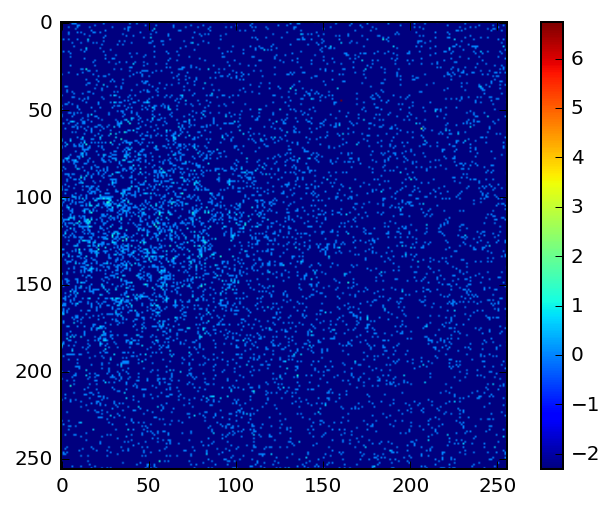

In [35]:
@interact(i=(0,len(pltscan)))
def plt_scans(i):
    img = pltscan[i].data[0:256,0:256]
    img = img.astype('float')
    img[img==0.] = 0.1
    plt.imshow(np.log(img))
    plt.colorbar()

$$
\dfrac{\sum_{x,y} \sum_i x_0 \cdot x_i}{\sum_{x,y} x_0^2}
$$

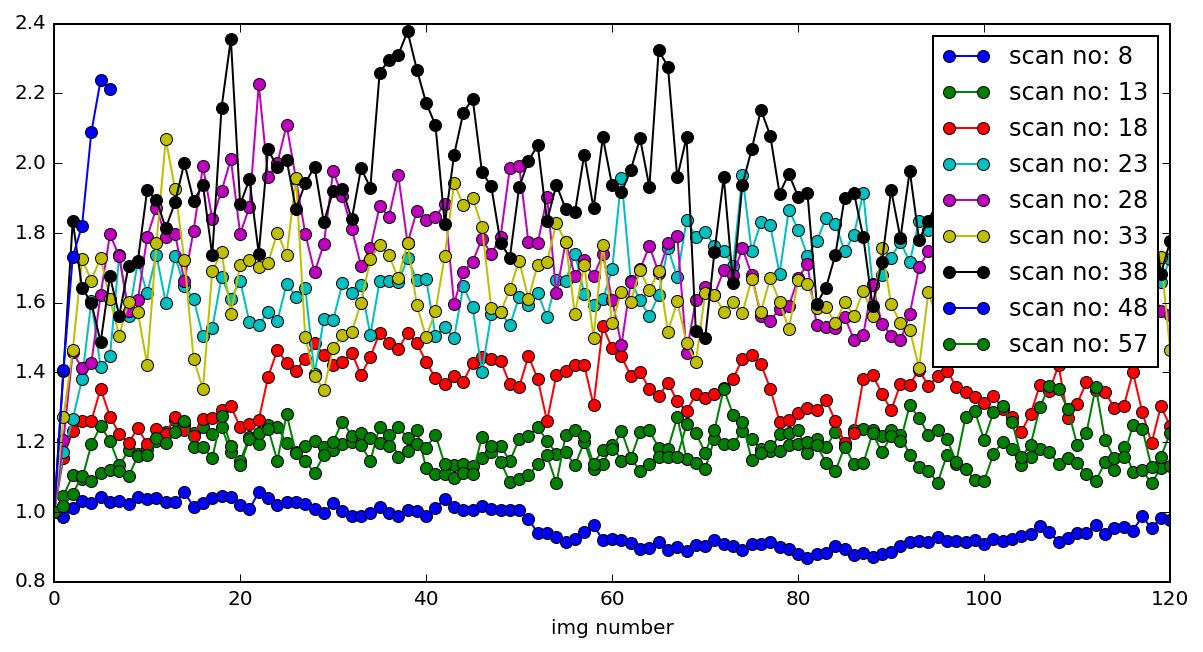

In [6]:
fig = plt.figure(figsize=(10,5))
for i,scan in enumerate(scan_total):
    
    ls = []
    for index in range(len(scan)):
        
        # Multiply each image in the scan by the first one
        im = scan[0].data[0:256,0:256] * scan[index].data[0:256,0:256]
        # Integrate it and place it in a list
        im = im.sum().sum()
        ls.append(im)
        
    ls = np.array(ls).astype('float')
    # Normalise
    norm = ls/((scan[0].data[0:256,0:256]**2).sum().sum())
    plt.plot(norm, '-o', label='scan no: {0}'.format(scan_numbers[i]))
    plt.legend()
    plt.xlabel('img number')

SSMI

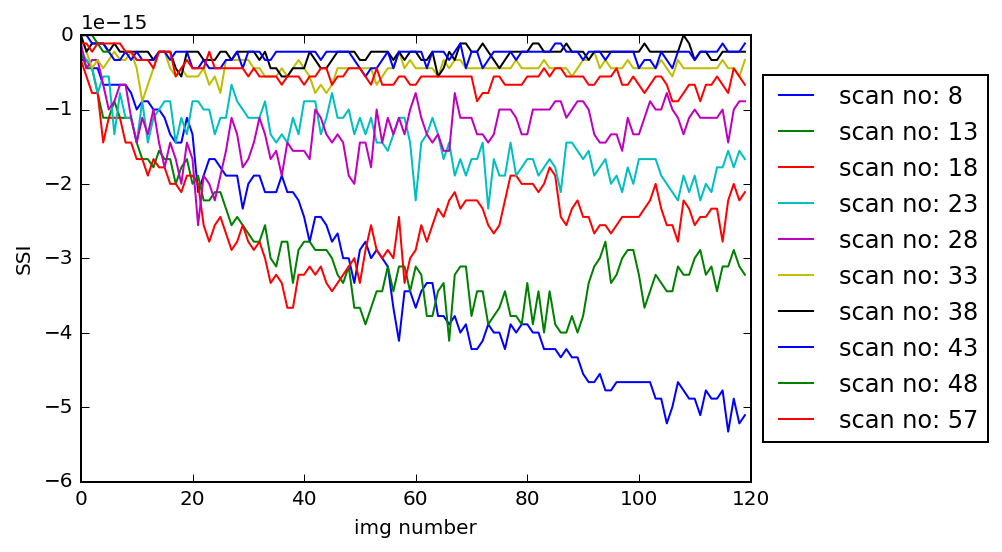

In [36]:
for i,scan in enumerate(scan_total):
    ssi = []
    for n in range(1,len(scan)):
        s = ssim(scan[0].data[0:256,0:256], scan[n].data[0:256,0:256])
        ssi.append(s)

    plt.plot(np.log(ssi),label='scan no: {0}'.format(scan_numbers[i]))
    plt.ylabel('SSI')
    plt.xlabel('img number');
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))